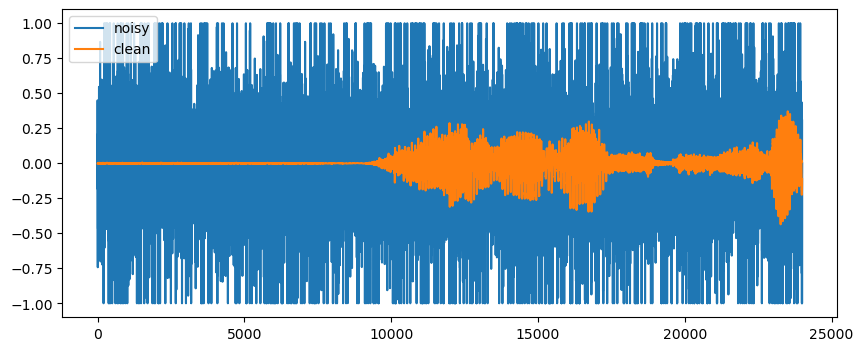

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
import torchaudio.transforms as T
import torchaudio.functional as AF

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from IPython.display import Audio

CLEAN_AUDIO_FILE = "./audio_file/0_0_174-84280-0000.flac_16.0khz_24.0kframes.wav"
NOISY_AUDIO_FILE = "./audio_file/distorted_0_0_174-84280-0000.flac_16.0khz_24.0kframes.wav"

clean_audio, clean_sr = torchaudio.load(CLEAN_AUDIO_FILE)
noisy_audio, noisy_sr = torchaudio.load(NOISY_AUDIO_FILE)

ipd.display(Audio(clean_audio.numpy(), rate=clean_sr))
ipd.display(Audio(noisy_audio.numpy(), rate=noisy_sr))

# plot both audio signals
plt.figure(figsize=(10, 4))
plt.plot(noisy_audio.t().numpy(), label='noisy')
plt.plot(clean_audio.t().numpy(), label='clean')
plt.legend()
plt.show()



In [18]:
criterion = nn.MSELoss()
l1_loss_criterion = nn.L1Loss()
loss = criterion(clean_audio, noisy_audio)
l1_loss = l1_loss_criterion(clean_audio, noisy_audio)
print(loss)
print(l1_loss)

tensor(0.0810)
tensor(0.1924)


In [19]:
loss_criterion_list = [nn.MSELoss(), nn.L1Loss(), nn.SmoothL1Loss(), nn.CrossEntropyLoss(), nn.PoissonNLLLoss()]
for loss_criterion in loss_criterion_list:
    loss = loss_criterion(clean_audio, noisy_audio)
    print(f"{loss_criterion} : {loss}")
    inverse_loss = loss_criterion(noisy_audio, clean_audio)
    print(f"{loss_criterion} : {inverse_loss}")

MSELoss() : 0.08096887916326523
MSELoss() : 0.08096887916326523
L1Loss() : 0.19238314032554626
L1Loss() : 0.19238314032554626
SmoothL1Loss() : 0.04047926515340805
SmoothL1Loss() : 0.04047926515340805
CrossEntropyLoss() : -200.95391845703125
CrossEntropyLoss() : -124.81181335449219
PoissonNLLLoss() : 0.9986478090286255
PoissonNLLLoss() : 1.039293885231018


In [20]:
empty_audio = torch.zeros_like(clean_audio)
for loss_criterion in loss_criterion_list:
    loss = loss_criterion(clean_audio, empty_audio)
    print(f"{loss_criterion} : {loss}")
    inverse_loss = loss_criterion(empty_audio, clean_audio)
    print(f"{loss_criterion} : {inverse_loss}")

MSELoss() : 0.004443767014890909
MSELoss() : 0.004443767014890909
L1Loss() : 0.03572570160031319
L1Loss() : 0.03572570160031319
SmoothL1Loss() : 0.0022218835074454546
SmoothL1Loss() : 0.0022218835074454546
CrossEntropyLoss() : -0.0
CrossEntropyLoss() : -43.34053421020508
PoissonNLLLoss() : 1.0020350217819214
PoissonNLLLoss() : 1.0


c:\Users\samue\Documents\Sam's School\GitHub\Audio-Undistortion\.conda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\samue\Documents\Sam's School\GitHub\Audio-Undistortion\.conda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


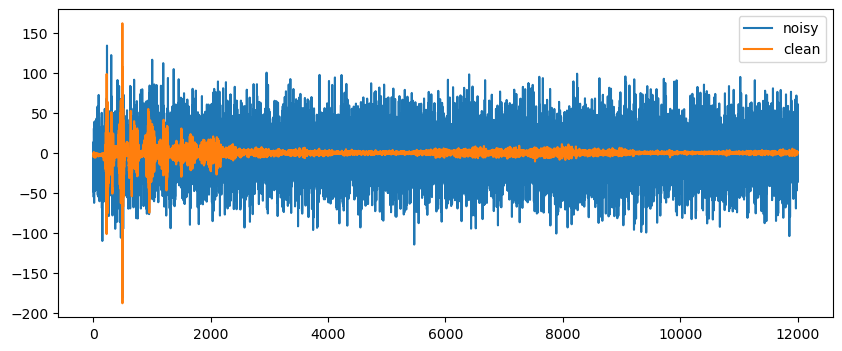

In [21]:
# fft both audio signals
clean_audio_fft = torch.fft.rfft(clean_audio, dim=1)
noisy_audio_fft = torch.fft.rfft(noisy_audio, dim=1)

plt.figure(figsize=(10, 4))
plt.plot(noisy_audio_fft.t().numpy(), label='noisy')
plt.plot(clean_audio_fft.t().numpy(), label='clean')

plt.legend()
plt.show()

In [22]:
criterion = nn.L1Loss() # L1 loss supports complex numbers
loss = criterion(clean_audio_fft, noisy_audio_fft)
print(loss)

tensor(39.0936)


In [23]:
empty_audio_fft = torch.fft.rfft(empty_audio, dim=1)
print(empty_audio_fft)
loss = criterion(clean_audio_fft, empty_audio_fft)
print(loss)

tensor([[0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j]])
tensor(4.6730)
